# CS 109A/AC 209A/STAT 121A Data Science: Homework 4
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 5th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

# I'm a title


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Hagmann, Tim]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

-

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

In [68]:
# Load data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',', skiprows=1)

# Split predictors and response
x = data[:, :-1]
y = data[:, -1]

df = pd.DataFrame(data)
df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117


In [69]:
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(x.T)
pd.DataFrame(corr_matrix)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,-0.189945,-0.232439,-0.215623,-0.228322,-0.047643,-0.061022,0.050977
1,1.000000,1.000000,1.000000,-0.189945,-0.232439,-0.215623,-0.228322,-0.047643,-0.061022,0.050977
2,1.000000,1.000000,1.000000,-0.189945,-0.232439,-0.215623,-0.228322,-0.047643,-0.061022,0.050977
3,-0.189945,-0.189945,-0.189945,1.000000,0.974279,0.964344,0.969540,0.058516,0.108294,-0.010416
4,-0.232439,-0.232439,-0.232439,0.974279,1.000000,0.982785,0.982227,0.080342,0.126004,-0.012399
5,-0.215623,-0.215623,-0.215623,0.964344,0.982785,1.000000,0.976308,0.079547,0.123368,-0.021029
6,-0.228322,-0.228322,-0.228322,0.969540,0.982227,0.976308,1.000000,0.074004,0.112241,-0.022023
7,-0.047643,-0.047643,-0.047643,0.058516,0.080342,0.079547,0.074004,1.000000,-0.133182,0.052151
8,-0.061022,-0.061022,-0.061022,0.108294,0.126004,0.123368,0.112241,-0.133182,1.000000,0.006923
9,0.050977,0.050977,0.050977,-0.010416,-0.012399,-0.021029,-0.022023,0.052151,0.006923,1.000000


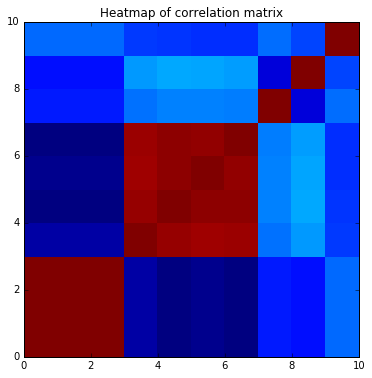

In [70]:
# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

 <span style="color:darkblue">
** Comment: ** <br>
pc It also shows that there are natural groups amongst them. There is a correlated group among the variables 0 to 2 and 3 to 6.<br>
</span>
<br>
<span style="color:darkblue">
When building a good regression model with a subset i would pick on of the variables 0 to 2, one 3 to 6 and 7, 8 and 9, i.e., 5 variables. 
</span>







### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

In [71]:
### Best Subset Selection
min_bic = 1e10 # set some initial large value for min BIC score
best_subset = [] # best subset of predictors

# Create all possible subsets of the set of 10 predictors
predictor_set = set(range(10)) # predictor set = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Repeat for every possible size of subset
for size_k in range(10): 
    # Create all possible subsets of size 'size', 
    # using the 'combination' function from the 'itertools' library
    subsets_of_size_k = it.combinations(predictor_set, size_k + 1) 
    
    max_r_squared = -1e10 # set some initial small value for max R^2 score
    best_k_subset = [] # best subset of predictors of size k
    
    # Iterate over all subsets of our predictor set
    for predictor_subset in subsets_of_size_k:    
        # Use only a subset of predictors in the training data
        x_subset = x[:, predictor_subset]

        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset 
        # we've found so far, remember the current predictor subset as the best!
        if(r_squared > max_r_squared): 
            max_r_squared = r_squared
            best_k_subset = predictor_subset[:]
                

    # Use only the best subset of size k for the predictors
    x_subset = x[:, best_k_subset]
        
    # Fit and evaluate BIC of the best subset of size k
    model = OLS(y, x_subset)
    results = model.fit()
    bic = results.bic
    
    # Update minimum BIC and best predictor subset
    # If current predictor has a lower BIC score than that of the best subset 
    # we've found so far, remember the current predictor as the best!
    if(bic < min_bic): 
        min_bic = bic
        best_subset = best_k_subset[:]
    
print('Best subset by exhaustive search:')
print sorted(best_subset)

Best subset by exhaustive search:
[0, 5, 7, 8, 9]


In [72]:
### Step-wise Forward Selection
d = x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):    
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print 'Step-wise forward subset selection:'
print sorted(best_subset) # add 1 as indices start from 0

Step-wise forward subset selection:
[0, 5, 7, 8, 9]


In [73]:
###  Step-wise Backward Selection
d = x.shape[1] # total no. of predictors

# Keep track of current set of chosen predictors
current_predictors = range(d)

# First, fit and evaluate BIC using all 'd' number of predictors
model = OLS(y, x)
results = model.fit()
bic_all = results.bic

# Set the minimum BIC score, initially, to the BIC score using all 'd' predictors
global_min_bic = bic_all
# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, d predictors to 1 predictor
for size in range(d - 1, 1, -1): # stop before 0 to avoid choosing an empty set of predictors
    max_r_squared = -1e10 # set some initial small value for max R^2
    worst_predictor = -1 # set some throwaway initial number for the worst predictor to remove
    bic_without_worst_predictor = 1e10 # set some initial large value for min BIC score  
        
    # Iterate over current set of predictors (for potential elimination)
    for i in current_predictors:
        # Create copy of current predictors, and remove predictor 'i'
        temp = current_predictors[:]
        temp.remove(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            worst_predictor = i
            bic_without_worst_predictor = results.bic
          
    # Remove worst predictor from current set of predictors
    current_predictors.remove(worst_predictor)
    
    # Check if BIC for the predictor we just removed is lower than 
    # the global minimum across all subset of predictors
    if(bic_without_worst_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_without_worst_predictor
    
print 'Step-wise backward subset selection:'
print sorted(best_subset)

Step-wise backward subset selection:
[2, 5, 7, 8, 9]


 <span style="color:darkblue">
** Comment: ** <br>
The subset selection shows that similar variables as the ones picked by me are chosen, i.e., [2, 5, 7, 8, 9] or [0, 5, 7, 8, 9]. 
</span>




### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

In [74]:
# Lasso regression
reg = Lasso_Reg(alpha = 0.01)
reg.fit(x, y)
coefficients = reg.coef_

print 'Lasso:'
print 'Coefficients:', coefficients
print  'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Lasso:
Coefficients: [ 0.02717417  0.          0.         -0.         -0.02532806 -0.         -0.
  0.04397321 -0.40612185 -0.22260474]
Predictors with non-zero coefficients: [0, 4, 7, 8, 9]


 <span style="color:darkblue">
** Comment: ** <br>
The predictors correspond with the correlation matrix, i.e., [0, 4, 7, 8, 9]</span>




In [75]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 0.01)
x[:,1] = x[:,0]
x[:,2] = x[:,0]
reg.fit(x, y)
coefficients = reg.coef_

print 'Ridge:'
print 'Coefficients:', coefficients
print 'Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0]

Ridge:
Coefficients: [ 0.04353543  0.04353543  0.04353543  0.55217415 -0.19706852 -0.61421737
  0.30484213  0.18742866 -0.50083242 -0.35908145]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<span style="color:darkblue">
** Comment: ** <br>
As is to be expected, the ridge regression selects all variables, i.e., [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. That means it doesn't correspond with the correlation matrix. 
</span>
<br>

<span style="color:darkblue">
The ridge regression assigns exactly the same value to the variables 0 to 2. This is because there is a prefect i.e., 1:1 correlation between those variables. The lasso regression doesn't show the same behavior, as there is only on of those variables selected.
</span>


## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


In [76]:
## Load data
data = pd.read_csv('datasets/dataset_2.txt')

# Split predictors and response
y = data.iloc[:, -1]
x = data.iloc[:, :-1]

## Transformations
# Transform symboling into categorical variable
x['symboling'] = x['symboling'].astype(object)

# Get categorical values
categorical_bolean = (x.dtypes == "object").values
x_numeric = x.loc[:, ~categorical_bolean]
x_categorical = x.loc[:, categorical_bolean]
x_dummies = pd.get_dummies(x_categorical)

## Scale the numerical x variables
x_numeric = x_numeric / x_numeric.std(axis=0)

## Bind data together
x = pd.concat([x_numeric, x_dummies], axis=1)
print x.shape


(205, 69)


### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

In [77]:
## Split the dataset
np.random.seed(856) # Set seed
x_train, x_test = train_test_split(x, test_size = 0.25)

## Split the variables
y_train = y.iloc[x_train.index.values]
y_test = y.iloc[x_test.index.values]
x_train = x.iloc[x_train.index.values, :]
x_test = x.iloc[x_test.index.values, :]

## Transform to numpy 
y_train = y_train.values
y_test = y_test.values
x_train = x_train.values
x_test = x_test.values


In [78]:
# First, let's do plain OLS
reg = Lin_Reg()
reg.fit(x_train, y_train)

train_r_squared_plain = reg.score(x_train, y_train)
test_r_squared_plain = reg.score(x_test, y_test)

print 'Plain Regression: R^2 score on training set', train_r_squared_plain
print 'Plain Regression: R^2 score on test set', test_r_squared_plain

Plain Regression: R^2 score on training set 0.990955195397
Plain Regression: R^2 score on test set 0.958059163439


<span style="color:darkblue">
** Comment: ** <br>
The R^2 values of the model are very high, i.e., 99% in the training an 95% in the test set. That is a near perfect fit. However, as is to be expected, the training set overfits the data a bit. Which can be noticed by the smaller test R^2. As it should be, both values lie between 0 and 1.
</span>
<br>

<span style="color:darkblue">
In this case of the linear regression it is not necessary to regularize the data. 
</span>



### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

In [79]:
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 1.0)
reg.fit(x_train, y_train)
coefficients = reg.coef_

predictors = [i for i, item in enumerate(coefficients) if abs(item) > 0]

print 'Ridge:'
print 'Coefficients:', coefficients
print 'Selected predictors:',predictors  
print 'Ridge Regression: R^2 score on training set', reg.score(x_train,y_train)
print 'Ridge Regression: R^2 score on test set', reg.score(x_test,y_test)

Ridge:
Coefficients: [  992.92148619   553.97771546   444.35687821  -828.94054753  -525.36834772
  2211.93526343   459.23600141  1160.12392818  4443.04676286 -1125.6272756
 -1718.78978862   315.37876754   344.79954543  -758.59928852  -924.65800278
   -36.75443242   457.93905479  1014.82987063  -630.91902486   119.56253464
   395.33569594  2884.31772629    77.27639028 -1644.3110965     13.51645961
  -704.2174629   3183.18495578 -1863.20872571 -1458.68909567  -836.10191045
  -667.66261737 -1441.07097977  2494.76231488   567.89881667  1449.1084432
 -2179.99901015  -893.98887089  -364.09680086   987.94576763    71.98632035
   -71.98632035  -905.22298642   905.22298642   181.93047182  -181.93047182
  2266.97626872   459.87867544  -736.78619848  -871.37469    -1118.69405569
    37.65252076    17.84309103   -55.49561178 -2998.30613842  2998.30613842
    77.68045447  -667.66261737  1229.61288637   818.30712827 -1457.93785174
  2794.18813447  -659.19799568  -128.44268015 -2006.54745864    13.51

In [80]:
# Run for different values of lambda 
lambda_min = -7
lambda_max = 7

num_lambdas = 15
num_predictors = x.shape[1]

lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

coeff_a = np.zeros((num_lambdas, num_predictors))

In [81]:
for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    # Evaluate train & test performance
    train_r_squared[ind] = reg.score(x_train, y_train)
    test_r_squared[ind] = reg.score(x_test, y_test)


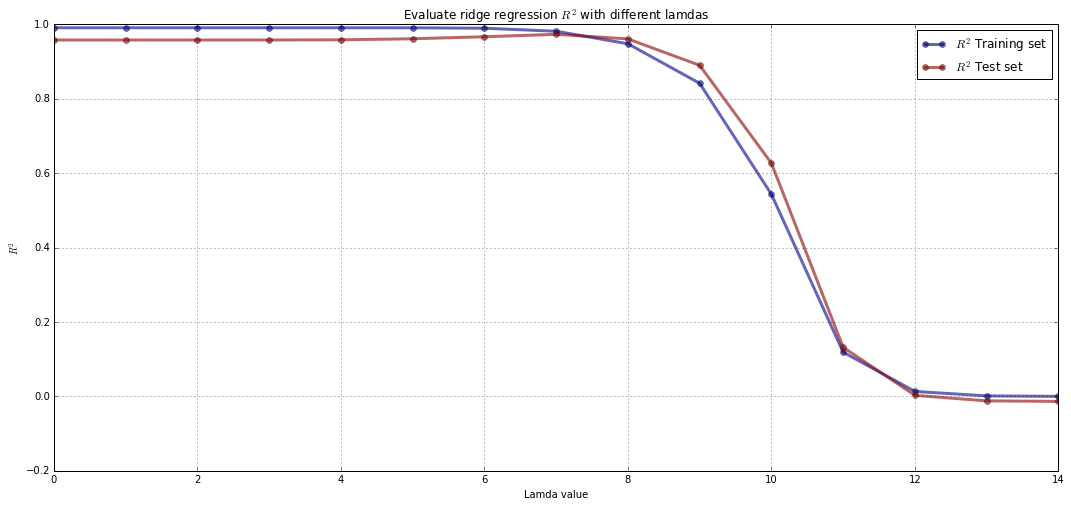

In [82]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 14)
plt.title(r'Evaluate ridge regression $R^2$ with different lamdas')
plt.legend(loc='best')
plt.grid()


<span style="color:darkblue">
** Comment: ** <br>
The best R^2 in the test set is reached when the lamda value is 0, i.e., when a standard linear regression is performed. That means that with this particular data set the variables shouldn't be scaled back. A lamda of zero means a OLS is preformerd while when the lamda goes to infinity the coefficients go to zero.
</span>
<br>

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

In [83]:
# Run for different values of lambda 
lambda_min = -7
lambda_max = 7

num_lambdas = 15
num_predictors = x.shape[1]

lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

train_r_squared = np.zeros(num_lambdas)
test_r_squared = np.zeros(num_lambdas)

In [84]:
kfold = KFold(n=len(x), n_folds=5, random_state=123)

for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train, y_train)
    results = cross_val_score(reg, x, y, cv=kfold, scoring="r2")
   
    # Evaluate train & test performance
    train_r_squared[ind] = results.mean()
    test_r_squared[ind] = reg.score(x_test, y_test)


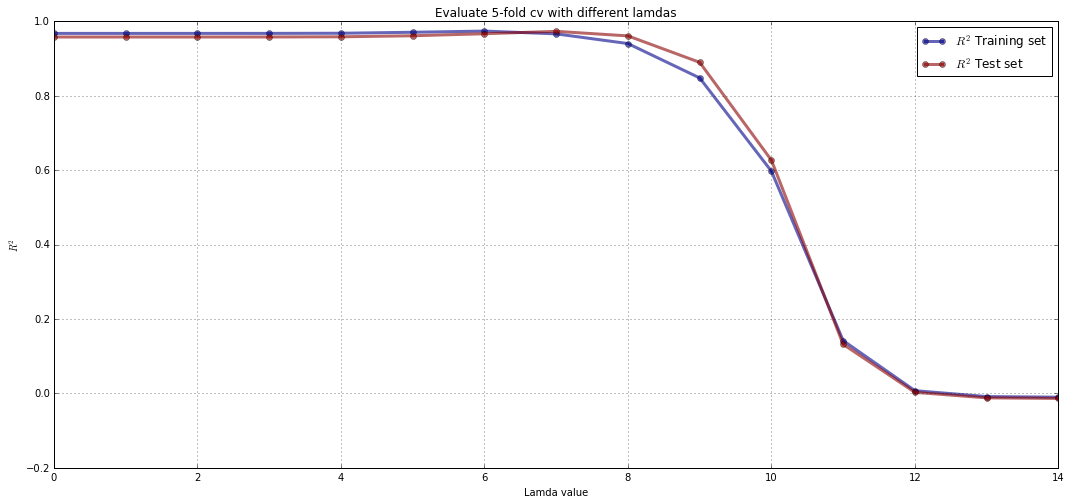

In [85]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 14)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()


<span style="color:darkblue">
** Comment: ** <br>
The $R^2$ for the test set from the cross validation follows a similar shape to the $R^2$ score on the test set from the other regressions.
</span>

<span style="color:darkblue">
The maximum $R^2$ from cross validation is achieved for $\lambda = 0$ and from ridge regression prediction on the test set, the maximum value of $R^2$ is also achieved with $\lambda = 0$. That mean both the CV and the ridge regression select the same model as the OLS. 
</span>

<span style="color:darkblue">
The lowest MSE is achieved for $\lambda = 0$ which corresponds to the model selected by the R^2 measure.   
</span>

<span style="color:darkblue">
As all the models tend to go to lamda = 0 they perform the same as the OLS regression.
</span>




## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

<span style="color:darkblue">
** Solution: ** <br>
The ridge regression takes the following form:
$$L(\beta) = (Y-X\beta)^T(Y-X\beta) + \lambda\beta^T\beta $$
</span>

<span style="color:darkblue">
The normal equations for ridge regression is:
$$(X^T\,X + \lambda I)\beta =  X^T Y $$
</span>

<span style="color:darkblue">
so $\beta$ is solved by using the following matrix inverse:
$$\beta = (X^T\,X + \lambda I)^{-1} X^T Y $$
</span>

<span style="color:darkblue">
X and Y can be enhanced so that the normal equation has the same form as for ordinary least squeres. That means including the $\lambda\beta^2$ into an $\overline{\mathbf{X}}$ matrix and $\overline{\mathbf{y}}$ vector.  As $\lambda >0$ the square root $\sqrt{\lambda}$ will be positive so the matrix X (an n×p matrix) can be augemented by appending the p x p matrix  $\sqrt{\lambda}I$, and the vector Y can be extended by appending a column of p zeros. The product $(\overline{\mathbf{y}}-\overline{\mathbf{X}}\beta)^T(\overline{\mathbf{y}}-\overline{\mathbf{X}}\beta)$ adds an additional p terms to the objective function of ordinary least squares of the form: 
</span>

<span style="color:darkblue">
$$(0 - \sqrt{\lambda}\beta_i)^2 = \lambda\beta^T\beta$$
which equals to the additional term in the function for the ridge regression.
</span>

<span style="color:darkblue">
That means that the normal equation for $\beta$ using the ridge regression can be rewritten as
$$(Y-X\beta)^T(Y-X\beta) + \lambda\beta^2  = (\overline{\mathbf{y}}-\overline{\mathbf{X}}\beta)^T(\overline{\mathbf{y}}-\overline{\mathbf{X}}\beta)$$
</span>

<span style="color:darkblue">
From the right the normal equation can then be rewritten as:
$${\overline{\mathbf{X}}}^T\,\overline{\mathbf{X}}\beta =  {\overline{\mathbf{X}}}^T \overline{\mathbf{y}} $$
</span>

<span style="color:darkblue">
which then can be solved using OLS.
</span>


<span style="color:darkblue">
The function for ridge regression takes the form:
$$F(\beta) = (Y-X\beta)^T(Y-X\beta) + \lambda\beta^T\beta $$
</span>

<span style="color:darkblue">
The function for OLS regression with $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$ takes the form:
$$F(\beta)= (\overline{\mathbf{y}} - \overline{\mathbf{X}})^T(\overline{\mathbf{y}} - \overline{\mathbf{X}})$$
</span>

<span style="color:darkblue">$\overline{\mathbf{y}}^T\overline{\mathbf{y}}=y^Ty$, as the bottom p terms of $\overline{\mathbf{y}}$ are all zero.</span>

<span style="color:darkblue">$\overline{\mathbf{y}}^T\overline{\mathbf{X}}=y^TX$, as the bottom p terms of $\overline{\mathbf{y}}$ are all zero.</span>

<span style="color:darkblue">$\overline{\mathbf{X}}^T\overline{\mathbf{X}}=\Big( X^T \ \sqrt{\lambda}I_p \Big) \begin{pmatrix}X \sqrt{\lambda}I_p\end{pmatrix}$.</span>

<span style="color:darkblue">
That means,
$$ L_{OLS}({\beta}) = (\overline{\mathbf{y}}-\overline{\mathbf{X}}\beta)^T(\overline{\mathbf{y}} - \overline{\mathbf{X}}\beta)$$
</span>

<span style="color:darkblue">
$$ = \overline{\mathbf{y}}^T\overline{\mathbf{y}} -2\overline{\mathbf{y}}^T\overline{\mathbf{X}} \beta + \beta^T \overline{\mathbf{X}}^T\overline{\mathbf{X}} \beta $$
</span>

<span style="color:darkblue">
$$  = y^Ty -2y^TX + \beta^T (X^T X + \lambda I_p) \beta $$
$$  = y^Ty -2y^TX + \beta^T(X^T X)\beta + \lambda \beta^T\beta $$
$$  = (y-X\beta)^T(y-X\beta) + \lambda\beta^T\beta $$
$$  = L_{RIDGE}(\beta) $$
</span>

<span style="color:darkblue">
That shows that the approach proposed implements Ridge regression with parameter $\lambda$.
</span>

### Part (b): Debug our implementation of ridge regression
You're a grader for CS109A, the following is an implemention of Ridge regression (via the above approach) submitted by a student. The dataset is ``dataset_3.txt``. The regression model is fitted to a training set, and the R^2 scores of the fitted model on the training and test sets are plotted as a function of the regularization parameter. Grade this solution according to the following rubric (each category is equally weighted): 

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

In addition to providing an holistic grade (between 0 to 5), provide a corrected version of this code that is submission quality.

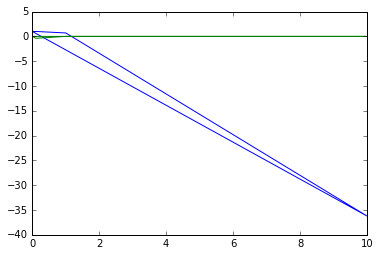

In [86]:
# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[0]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]
    import sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(m,x_test,y_test, reg_param):
    n=np.shape(x_train)[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+np.shape(x_test)[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.5))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i

# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
for j in range(0,5):    
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
plt.plot(a,rstr)
plt.plot(a,rsts)

<span style="color:darkblue">
** Corrected version: **
</span>


In [87]:
# Load packages
from sklearn.linear_model import LinearRegression as Lin_Reg


In [88]:
# Functions:
# Fit
def ridge(x_train, y_train, reg_param):
    n, p = np.shape(x_train) # x is an n x p matrix
    x_train = np.concatenate((x_train, np.sqrt(10.0**reg_param)*np.identity(p)), axis=0)
    y_train = np.concatenate((y_train, np.zeros(p)), axis=0)
    model = Lin_Reg()
    model.fit(x_train, y_train)
    return model

# Score
def score(m, x_test,y_test, reg_param):
    n, p = np.shape(x_train) # x is an n x p matrix
    x_test = np.concatenate((x_test, np.sqrt(10.0**reg_param)*np.identity(p)), axis=0)
    y_test = np.concatenate((y_test, np.zeros(p)), axis=0)
    return m.score(x_test, y_test)


In [89]:
# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')

# Extract out x and y
x_df = data[:, 0:-1]
y_df = data[:, -1]

n = data.shape[0]
n_train = int(np.round(n*0.5))

# shuffle data and split into test and train sets
indices = np.random.permutation(range(n))
train_indices = indices[0:n_train]
test_indices = indices[n_train:]

x_standardised = x_df

x_train = x_standardised[train_indices,:]
y_train = y_df[train_indices]
x_test = x_standardised[test_indices,:]
y_test = y_df[test_indices]

In [90]:
# Generate an array of lambda values 
lambdas=np.linspace(-2,2, 100)
num_lambdas = len(lambdas)

# Initialise empty arrays for storing r2 values
r2_train =np.zeros(num_lambdas)
r2_test =np.zeros(num_lambdas)

In [91]:
# Iterate over the values of lambda 
for i in range(num_lambdas): 
    # fit a ridge regression model on the training set
    model = ridge(x_train,y_train,lambdas[i])
    # predict on the test 
    r2_train[i]=score(model, x_train,y_train,lambdas[i])
    r2_test[i]=score(model, x_test,y_test, lambdas[i])


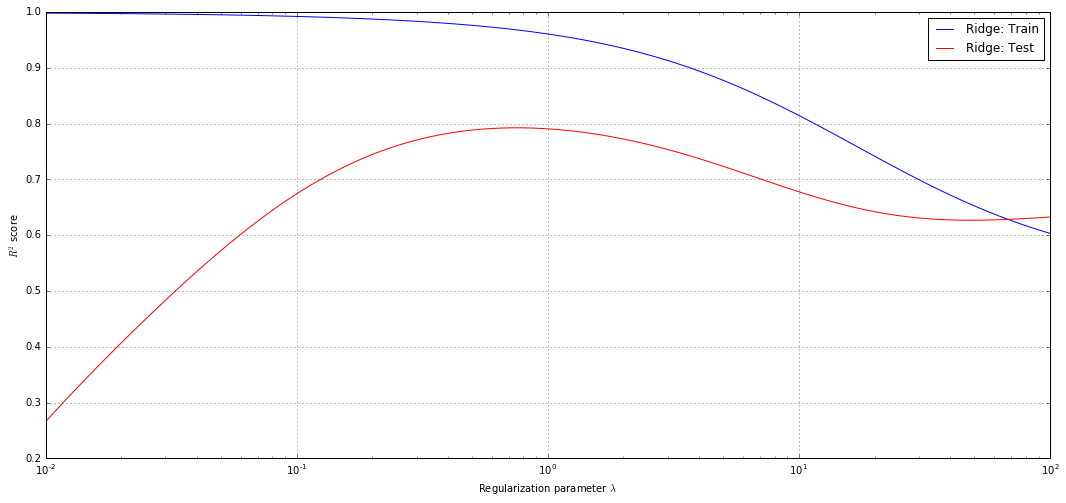

In [92]:
# Ploting
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.semilogx(10.0**lambdas, (r2_train), c='b', label='Ridge: Train')
ax.semilogx(10.0**lambdas, (r2_test), c='r', label='Ridge: Test')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')
ax.legend(loc = 'best')
plt.grid()


<span style="color:darkblue">
** Comment: ** <br>
The best R^2 in the test set is reached with 0.79259, i.e., when the lamda value is slightly smaller than 10'0. 
</span>
<br>


<span style="color:darkblue">
** Grade: ** <br>
</span>
<span style="color:darkblue">
Correctness <br>
-The student made a couple of errors in the code.<br><br>
Interpretation (if applicable)<br>
-The student didn't add interpretation.<br><br>
Code/algorithm design<br>
-The student used poor labelling for the variables<br> 
-The student didn't really comment in the code<br><br>
Presentation<br>
-No axes labels in the plots and no legend<br>
<br><br>
Grade 3.5/5
</span>


## Challenge Problem: Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_4.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

**Note**: For additional information about the attributes used, please look up the file `dataset_4_description.txt`. This files also contains details of attributes that have been omitted from the data set.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 

In [106]:
## Function
def Ridge_Regression(x_test, y_test, x_train, y_train, min_el, max_el):
    
    # Create lambdas spaced between min and max
    ells = np.array(range(min_el, max_el+1))
    
    num_lambdas = len(ells)
    num_datapoints, num_predictors = np.shape(x_train)
    
    # Initialise empty array
    train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)
    coeff_a =np.zeros((num_lambdas, num_predictors))
    test_mse = np.zeros(num_lambdas)
    
    # Iterate through the lambdas
    for i, ell in enumerate(ells):
        
        reg = Ridge_Reg(alpha=10**ell)
        reg.fit(x_train, y_train)
        
        # calculate MSE
        test_mse[i] = np.sum((y_test-reg.predict(x_test))**2)/float(len(y_test))

        test_r_squared[i] = reg.score(x_test, y_test)
        train_r_squared[i] = reg.score(x_train, y_train)
        
        print 'Lambda = ', 10**ell, '  Test R2 =  ', reg.score(x_test, y_test)
        
        # save the coefficients for plotting
        coeff_a[i,:] = reg.coef_
        
    return train_r_squared, test_r_squared, coeff_a, ells, test_mse

def Lasso_Regression(x_test, y_test, x_train, y_train, min_el, max_el):
    
    # Create a vector of lambdas
    ells = np.linspace(min_el, max_el, 100)
    num_lambdas = len(ells)
    num_predictors = np.shape(x_train)[1]
    
    # Empty arrays to store r2 values and coefficients
    train_r_squared = np.zeros(num_lambdas)
    test_r_squared = np.zeros(num_lambdas)
    coeff_a = np.zeros((num_lambdas, num_predictors))
    test_mse = np.zeros(num_lambdas)
 
    # Loop
    for i, ell in enumerate(ells):
        
        # Ridge regression
        reg = Lasso_Reg(alpha=10**ell)
        reg.fit(x_train, y_train)
        test_mse[i] = np.sum((y_test-reg.predict(x_test))**2)/float(len(y_test))

        # Calculate R2
        r2_test = reg.score(x_test, y_test)
        r2_train = reg.score(x_train, y_train)
        test_r_squared[i] = r2_test
        train_r_squared[i] = r2_train
        coeff_a[i,:] = reg.coef_
        
    return train_r_squared, test_r_squared, coeff_a, ells, test_mse

In [94]:
# Load the dataset
data4 = pd.read_csv('datasets/dataset_4.txt', sep=',')

In [98]:
# Extract the predictors and the response 
df_x4 = data4.iloc[:, 0:-1]
df_y4 = data4.iloc[:,-1]

print 'Shape before expansion: ', df_x4.shape
num_predictors4 = np.shape(df_x4)[1]
data4_expanded = pd.DataFrame({})

# Loop
for column in df_x4.columns:
    # For categorical variables, is the number of unique items < 20 or data type is an object
    if (len(df_x4[column].unique()) < 20 or (df_x4[column].dtype == np.dtype('object'))):
        # apply one-hot encoding
        encoded_col = pd.get_dummies(df_x4[column])
        data4_expanded = pd.concat([data4_expanded, encoded_col], axis=1) 
    else:
        data4_expanded = pd.concat([data4_expanded, df_x4[column]], axis=1) 
        
data4_expanded.head()

Shape before expansion:  (8928, 376)


,ABC,ABD,ACC,ACG,ACL,ACS,ACT,ADD,ADM,ADR,...,X,C,L,X,CLUSTER2,A,B,C,D,_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,11.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0


In [99]:
# Extract the predictors and the response 
x4 = data4_expanded.iloc[:, 0:-1].values
y4 = df_y4.values.reshape(len(df_y4.values), 1)

# Split into train and test set
n = x4.shape[0]
n_train = int(np.round(n*0.7))
indices = np.random.permutation(range(n))
train_indices = indices[0:n_train]
test_indices = indices[n_train:]

# The first 25% are in the training set, the rest is in the test set (assuming the data has been ran. shuffeled) 
x4_train = x4[train_indices,:]
y4_train = y4[train_indices]
x4_test = x4[test_indices,:]
y4_test = y4[test_indices]


In [100]:
# OLS regression
reg4 = Lin_Reg()
reg4.fit(x4_train, y4_train)

train_rsquared4 = reg4.score(x4_train, y4_train)
test_rsquared4 = reg4.score(x4_test, y4_test)

# Print results
print 'Shape of Training set', x4_train.shape
print 'Shape of Testing set', x4_test.shape
print 'Plain Regression: R^2 score on training set', train_rsquared4
print 'Plain Regression: R^2 score on test set', test_rsquared4

Shape of Training set (6250L, 3159L)
Shape of Testing set (2678L, 3159L)
Plain Regression: R^2 score on training set 0.543766085401
Plain Regression: R^2 score on test set -2.99313600933e+14


<span style="color:darkblue">
** Comment: ** <br>
The OLS Regression performs quite bad on the test data. This is because the number of predictors is very large, i.e., the same order as the number of data points. Furthermore, on the test set, the number of predictors is larger than the number of samples. 
</span>
<br>




### Ridge Regression

In [101]:
# Ridge regression
ridge_reg4 = Ridge_Reg(alpha=1.0)
ridge_reg4.fit(x4_train, y4_train)
train_rsquared4 = ridge_reg4.score(x4_train, y4_train)
test_rsquared4 = ridge_reg4.score(x4_test, y4_test)

# Print results
print 'Ridge Regression: R^2 score on training set', train_rsquared4
print 'Ridge Regression: R^2 score on test set', test_rsquared4

Ridge Regression: R^2 score on training set 0.516172699128
Ridge Regression: R^2 score on test set -0.109274659067



<span style="color:darkblue">
** Comment: ** <br>
Ride regression wiht a $\lambda$ value of 1 performs still very badly as the R2 on the test set is negative. 
</span>
<br>

In [102]:
# Trying with different values of lambda
train_r_squared, test_r_squared, coeff_a, lambdas, y_test_predict = Ridge_Regression(x4_test, y4_test, x4_train, y4_train, -5,15) 


Lambda =  1e-05   Test R2 =   -0.872085836202
Lambda =  0.0001   Test R2 =   -0.802908596416
Lambda =  0.001   Test R2 =   -0.662179557466
Lambda =  0.01   Test R2 =   -0.567758349764
Lambda =  0.1   Test R2 =   -0.362100672867
Lambda =  1   Test R2 =   -0.109274659067
Lambda =  10   Test R2 =   0.0492078051161
Lambda =  100   Test R2 =   0.124051206484
Lambda =  1000   Test R2 =   0.159548324042
Lambda =  10000   Test R2 =   0.161875952559
Lambda =  100000   Test R2 =   0.159749199027
Lambda =  1000000   Test R2 =   0.131203763498
Lambda =  10000000   Test R2 =   0.0807001579181
Lambda =  100000000   Test R2 =   0.0388706995544
Lambda =  1000000000   Test R2 =   0.0173118645763
Lambda =  1410065408   Test R2 =   0.0161581895034
Lambda =  1215752192   Test R2 =   0.0166129936853
Lambda =  -727379968   Test R2 =   -0.0888464977463
Lambda =  1316134912   Test R2 =   0.0163621092223
Lambda =  276447232   Test R2 =   0.0259374350161
Lambda =  -1530494976   Test R2 =   0.00744011999538


(1e-05, 100000000000L)

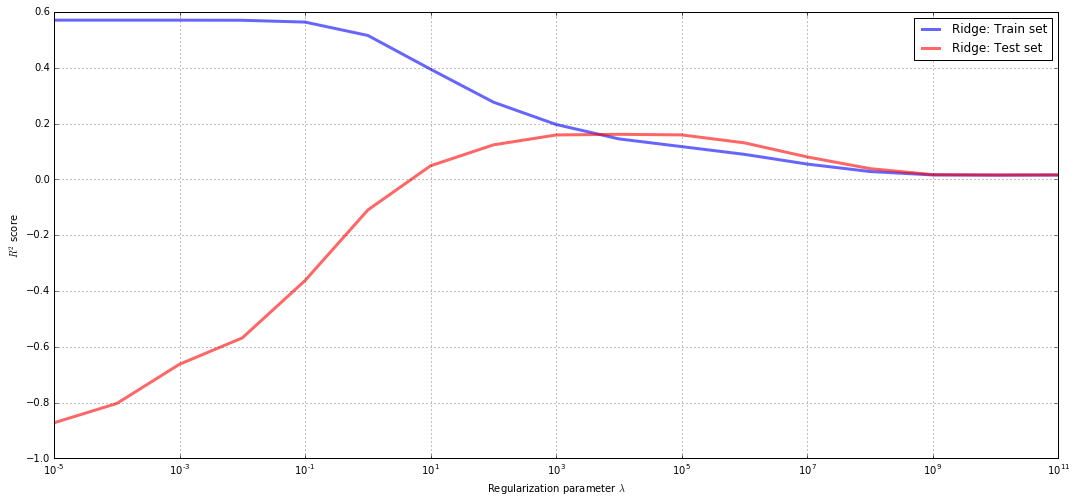

In [103]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Ridge: Train set', color="darkblue", alpha=0.6, linewidth=3)
ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Ridge: Test set', color="darkred", alpha=0.6, linewidth=3)
ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')
ax.legend(loc = 'best')
ax.grid()
plt.xlim(10**(-5), 10**(11))


<span style="color:darkblue">
** Comment: ** <br>
Itterating over different values of $\lambda$ shows that the R2 score can be improved. The best $R^2$ of 0.0731 is achieved for $\lambda = 1000$. For values of $\lambda$ smaller than 10, the R2 is negative and for values bigger than 1000, the R2 starts moving closer to zero.  </span>
<br>


### Lasso Regression

In [107]:
# Lasso regression
train_r_squared, test_r_squared, coeff_a, lambdas, test_mse = Lasso_Regression(x4_test, y4_test, x4_train, y4_train, -5,15) 


(1e-05, 100000000000L)

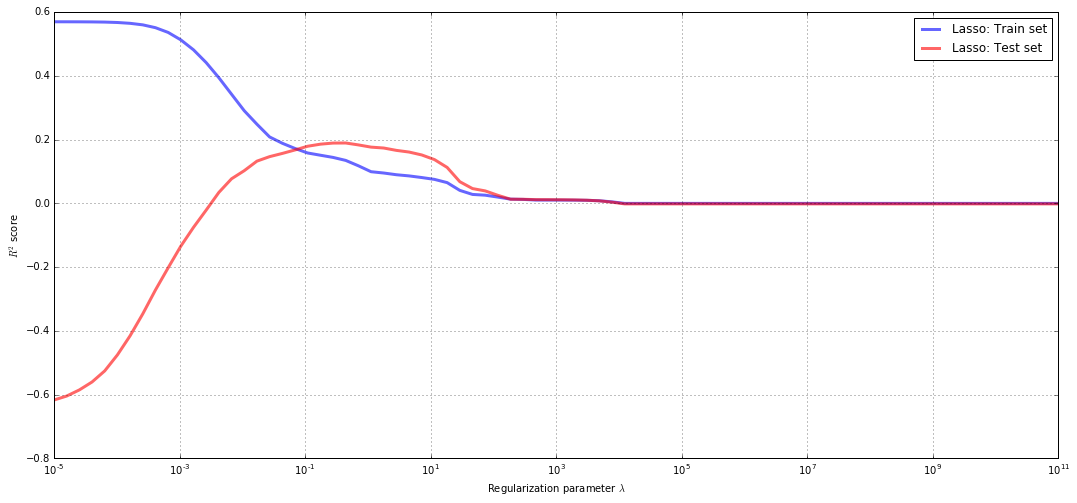

In [108]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.semilogx(10.0**lambdas, (train_r_squared), c='b', label='Lasso: Train set', color="darkblue", alpha=0.6, linewidth=3)
ax.semilogx(10.0**lambdas, (test_r_squared), c='r', label='Lasso: Test set', color="darkred", alpha=0.6, linewidth=3)
ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$R^2$ score')
ax.legend(loc = 'best')
ax.grid()
plt.xlim(10**(-5), 10**(11))


<span style="color:darkblue">
** Comment: ** <br>
The highest R2 value of the Lasso regression is reached at around 0.2.
</span>
<br>


In [109]:
## Evaluate profit
ridge_reg4 = Ridge_Reg(alpha=1000)
ridge_reg4.fit(x4_train, y4_train)

y_predict = ridge_reg4.predict(x4).flatten()

# Select 200 people to mail
donors_sorted = sorted(y_predict, reverse = True)
donors = y4.reshape(len(y4))


In [110]:
# Iterate
max_num_donors = 500
max_profit = np.zeros(max_num_donors)
random_profit = np.zeros(max_num_donors)

for n in xrange(max_num_donors):
    max_profit[n] = sum(donors_sorted[0:n]) - n*7
    random_profit[n] = np.sum(np.random.choice(donors, n, replace=False)) - n*7


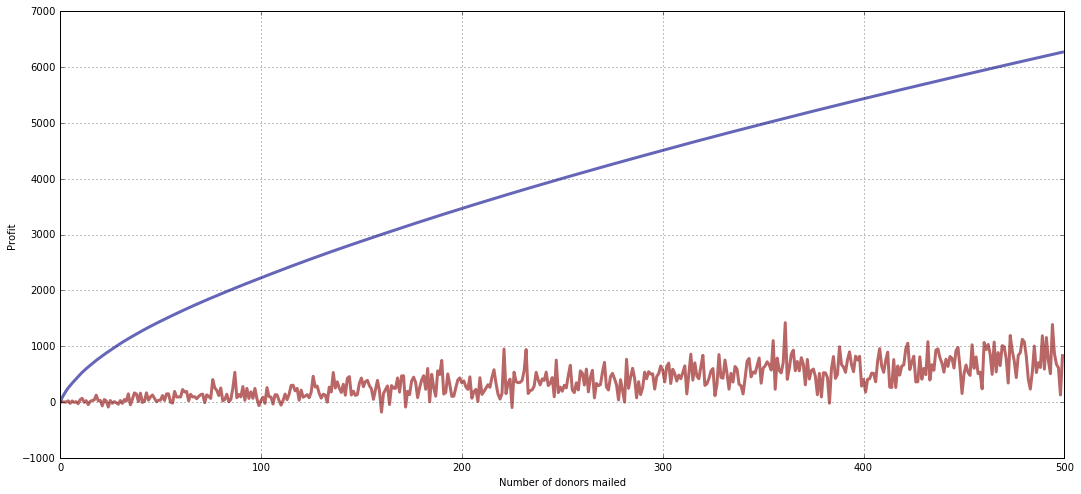

In [111]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(xrange(max_num_donors), max_profit, color="darkblue", alpha=0.6, linewidth=3)
ax.plot(xrange(max_num_donors), random_profit, color="darkred", alpha=0.6, linewidth=3)
ax.set_xlabel('Number of donors mailed')
ax.set_ylabel('Profit')
ax.grid()


<span style="color:darkblue">
** Comment: ** <br>
When supposing that the cost cost of mailing the donor is \$7 it can be seen that mailing with the regression model as a base is much more profitable than a blanked mailing compagne. This also shows that in hindsight using a regression model is better than assuming that there is no underlying relationship. Nevertheless, the model still could be improved by quit a bit as it only is able to explain around 20% of the variation in the dataset. 
</span>
